<a href="https://colab.research.google.com/github/SaniyaBubere/book-recommendation-system/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -*Saniya Bubere*
##### **Team Member 2 -*Rahul Jadhav*
#### **Team Member 3 -*Rupali Dawkore*


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. 

The main objective is to create a book recommendation system for users.

##Content

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [144]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Load Dataset of Books,Users,Ratings 
books_df=pd.read_csv("/content/drive/MyDrive/Capstone Project 4/Books.csv")
users_df=pd.read_csv("/content/drive/MyDrive/Capstone Project 4/Users.csv")
ratings_df=pd.read_csv("/content/drive/MyDrive/Capstone Project 4/Ratings.csv")


##For Books Data Set

### Dataset First View

In [147]:
# Dataset First Look 
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Dataset Rows & Columns count

In [148]:
# Get the number of rows and columns
rows, columns = books_df.shape

In [149]:
# Print the number of rows and columns
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  271360
Number of columns:  8


### Dataset Information

In [150]:
# Dataset Info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


We have Non-Null values in Book-Author , Publisher , Image-URL-L

#### Duplicate Values

In [151]:
# Dataset Duplicate Value Count
books_df[books_df.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


There is No Duplicate Values in Books Dataframe

###Dropping Columns

In [152]:
# Dropping Unnecessary columns
books_df.drop(['Image-URL-S', 'Image-URL-M','Image-URL-L'], axis = 1, inplace = True) 

#### Missing Values/Null Values

We have missing value in Book-Author & Publisher.            

In [153]:
# Missing Values/Null Values Count
print(np.where(books_df["Book-Author"].isna())[0])   # returns a NumPy array
print(np.where(books_df['Publisher'].isna())[0])     # returns a NumPy array

[187689]
[128890 129037]


In [154]:
# Select Row by Integer Index
print(books_df.iloc[187689])

ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                                          NaN
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Name: 187689, dtype: object


In [155]:
# Select Row by Integer Index
print(books_df.iloc[128890])
print(books_df.iloc[129037])

ISBN                        193169656X
Book-Title                 Tyrant Moon
Book-Author            Elaine Corvidae
Year-Of-Publication               2002
Publisher                          NaN
Name: 128890, dtype: object
ISBN                        1931696993
Book-Title             Finders Keepers
Book-Author            Linnea Sinclair
Year-Of-Publication               2001
Publisher                          NaN
Name: 129037, dtype: object


In [156]:
books_df['Book-Author'] = books_df['Book-Author'].fillna('others')

In [157]:
books_df['Publisher'] = books_df['Publisher'].fillna('others')

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [158]:
# Dataset Columns

In [159]:
# Dataset Describe

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [160]:
# Check Unique Values for each variable.
# looking for columns in Books dataset
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [161]:
#Function for printing the Unique Values of Each column in dataframe
def get_all_unique_values(df):
    for col in df.columns:
        print(f"Unique values in column '{col}':")
        print(df[col].unique())
        print()

In [162]:
# Get and print all unique values
get_all_unique_values(books_df)

Unique values in column 'ISBN':
['195153448' '2005018' '60973129' ... '006008667X' '192126040' '767409752']

Unique values in column 'Book-Title':
['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]

Unique values in column 'Book-Author':
['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']

Unique values in column 'Year-Of-Publication':
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 

## 3. ***Data Wrangling***

### Data Wrangling Code

In Year-Of-Publication We Have Values like 0 , DK Publishing Inc , Gallimard.

In [163]:
# Checking the values of DK Publishing Inc
row_of_DK_Publishing_Inc = books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']
row_of_DK_Publishing_Inc

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [164]:
# Checking the values of Gallimard
row_of_Gallimard = books_df[books_df['Year-Of-Publication'] == 'Gallimard']
row_of_Gallimard

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


We can See that the row have been shifted column wise from Book-Author to so on

In [165]:
# checking for the Author's Name
books_df.iloc[209538]['Book-Title'], books_df.iloc[221678]['Book-Title'],books_df.iloc[220731]['Book-Title']

('DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"',
 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"',
 'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"')

In [166]:
# fixing all the values
books_df.iloc[209538][['Book-Title','Book-Author','Year-Of-Publication','Publisher']] = ("DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)","Michael Teitelbaum",2000,'DK Publishing Inc')
books_df.iloc[221678][['Book-Title','Book-Author','Year-Of-Publication','Publisher']] = ("DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)","James Buckley",2000,'DK Publishing Inc')
books_df.iloc[220731][['Book-Title','Book-Author','Year-Of-Publication','Publisher']]= ("Peuple du ciel, suivi de \'Les Bergers",'Jean-Marie Gustave Le ClÃ?Â©zio',2003,'Gallimard')


In [167]:
# Rechecking
books_df.iloc[[209538,221678,220731]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [168]:
books_df["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [169]:
# convert "Fee" from String to int
books_df= books_df.astype({'Year-Of-Publication':'int'})
print(books_df.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
dtype: object


The 'Year-Of-Publication' column in the dataset is of integer type, with values ranging from 0 to 2050. However, as the dataset was created in 2004, it is assumed that all years after 2006 are invalid, allowing for a margin of two years in case the dataset was updated. Any invalid entries in this column, including those with a value of 0, will be converted to NaNs using a boolean mask. Afterward, the remaining valid values in the column will be used to calculate the median year. Finally, all NaN values in the column will be replaced with the calculated median year. This process ensures that the data is clean and usable for analysis.

In [170]:
# Convert invalid values to NaN
mask = (books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0)
books_df.loc[mask, 'Year-Of-Publication'] = np.nan

# Replace NaN values with median of remaining valid values
median_year = books_df['Year-Of-Publication'].median()
books_df['Year-Of-Publication'].fillna(median_year, inplace=True)

In [171]:
#checking for null values
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

* Now there are no null values...

# Users Dataset

### Users Dataset First Look

In [172]:
# Users Dataset First Look
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [173]:
# Dataset Rows & Columns count
row,columns=users_df.shape
print("Rows of Users Df",row)
print("Columns of Users Df",columns)


Rows of Users Df 278858
Columns of Users Df 3


### Dataset Information

In [174]:
# Dataset Info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* This dataset consists of 3 features with 278858 entries with 'Age' column having Null Values.

* Age Column have lots of Null Values

In [175]:
#Dataset Describe
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


#### Duplicate Values

In [176]:
# Dataset Duplicate Value Count
users_df[users_df.duplicated()]

,User-ID,Location,Age


No Duplicates found

## ***2. Understanding Your Variables***

In [177]:
# Dataset Columns

In [178]:
# Dataset Describe

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [179]:
# looking for columns in Books dataset
users_df.columns
 

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [180]:
# Get and print all unique values
get_all_unique_values(users_df)

Unique values in column 'User-ID':
[     1      2      3 ... 278856 278857 278858]

Unique values in column 'Location':
['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']

Unique values in column 'Age':
[ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210

#### Missing Values/Null Values

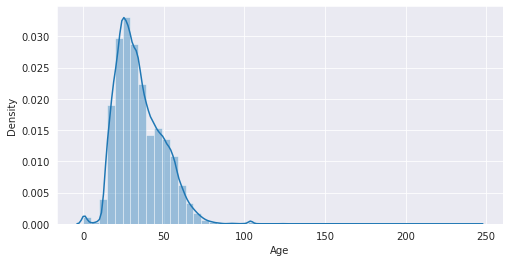

In [181]:
# distribution of Age column
plt.figure(figsize=(8,4))
sns.distplot(users_df['Age']);

* The feature Age is Rightly skewed. Replacing Null values with Median value

Upon checking the unique values, userID looks correct. However, Age column has a NaN and some very high values. In my view ages below 5 and above 90 do not make much sense, and hence, these are being replaced with NaNs. All the NaNs are then replaced with median value of Age, and its data type is set as int.

In [182]:
# Convert invalid values to NaN
masking= (users_df['Age'] > 90) | (users_df['Age'] < 5)
users_df.loc[masking, 'Age'] = np.nan

# Replace NaN values with median of remaining valid values
median_age = users_df['Age'].median()
users_df['Age'].fillna(median_age, inplace=True)

In [183]:
# Checking the null values
users_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

* No Null values are present now....

### What did you know about your dataset?

Answer Here

## 3. ***Data Wrangling***

### Data Wrangling Code

In [184]:
import re

def extract_country(location):
    pattern = r',\s?(\w+\s?\w*)\"*$'
    match = re.search(pattern, location)
    if match:
        return match.group(1)
    else:
        return None

users_df['Country'] = users_df['Location'].apply(extract_country)

In [185]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
 3   Country   273901 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ MB


In [186]:
users_df.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",32.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",32.0,united kingdom


In [187]:
users_df.drop("Location", axis = 1, inplace = True)

In [188]:
users_df.Country.unique()

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', None, 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', 'vietnam', 'sri lanka', 'pakistan', 'denmark', 'belgium',
       'malaysia', 'turkey', 'philippines', 'greece', 'colombia',
       'norway', 'kuwait', 'chile', 'quit', 'lj', 'taiwan', 'españa',
       'sweden', 'argentina', 'nigeria', 'london', 'bulgaria', 'austria',
       'romania', 'singapore', 'albania', 'egypt', 'tunisia',
       'uzbekistan', 'qatar', 'syria', 'saudi arabia', 'indonesia',
       'sudan', 'somewherein space', 'poland', 'thailand', 'ireland',
       'venezuela', 'paraguay', 'mozambique', 'morocco', 'afghanistan',
       'estonia', 'clackamas', 'lesotho', 'yugoslavia', 'slovakia',
       'costa rica', 'basque country', 'ethiopia', 'croatia', 'israel',
       'jap

In [189]:
# Let's Replace some Misspelt Countries 
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria',
                             'autralia','cananda','geermany','germay','italia','united kindgonm','united sates','united staes',
                             'united state','united states','us','urugua','indiai','canada eh','le canada'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia',
                            'canada','germany','germany','italy','united kingdom','usa','usa','usa','usa','usa',
                            'uruguay','india','canada','canada'],inplace=True)

In [190]:
users_df['Country'].fillna('other',inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.

# Rating Dataset

### First Look of Rating Dataset

In [191]:
#first look for rating dataset
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


### Count Rows and Columns

In [192]:
row,col=ratings_df.shape
print("Row:",row)
print("col:",col)

Row: 1048575
col: 3


### Dataset Information

In [193]:
#Dataset Info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


* There is No Null Values in the above dataset

In [194]:
# Dataset Describe
ratings_df.describe()

,User-ID,Book-Rating
count,1.048575e+06,1.048575e+06
mean,1.285089e+05,2.879907e+00
std,7.421876e+04,3.857870e+00
min,2.000000e+00,0.000000e+00
25%,6.339400e+04,0.000000e+00
50%,1.288350e+05,0.000000e+00
75%,1.927790e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Unique Values Count

In [195]:
# Get and print all unique values
get_all_unique_values(ratings_df)

Unique values in column 'User-ID':
[276725 276726 276727 ... 250760 250761 250764]

Unique values in column 'ISBN':
['034545104X' '155061224' '446520802' ... '048623715X' '486256588'
 '515069434']

Unique values in column 'Book-Rating':
[ 0  5  3  6  8  7 10  9  4  1  2]



### Data Wrangling

Let's create a new dataset that consists of ratings for only those books that are present in our books_df dataset and for only those users who are present in our users dataset

In [196]:
# Filter ratings to only include ISBN present in books_df
ratings_df = ratings_df[ratings_df['ISBN'].isin(books_df['ISBN'])]

# Filter ratings to only include users present in users_df
ratings_df = ratings_df[ratings_df['User-ID'].isin(users_df['User-ID'])]

In [197]:
# Dataset Shape
ratings_df.shape

(941112, 3)

Before we have 1048575 shape of ratings df now after manupilation we have 941112 that means some values are dropped

In the dataset, there are two types of ratings: explicit ratings, which are on a scale of 1-10, and implicit ratings, which are represented by a 0. To build our book recommendation system, we will only use the explicit ratings.

Similarly, the users in the dataset can be divided into two groups: those who have provided explicit ratings and those whose behavior was recorded implicitly (meaning, they did not provide any rating). We will only consider the users who have provided explicit ratings to build our recommendation system.

In [198]:
# In explicit we will take only that is not equal to 0
ratings_df_explicit = ratings_df[ratings_df['Book-Rating']!=0]
# In imlicit we will take only that is equal to 0 
ratings_df_implicit = ratings_df[ratings_df['Book-Rating']==0]

In [199]:
# Compute average rating for each book (ISBN)
book_ratings = ratings_df_explicit.groupby('ISBN')['Book-Rating'].mean()

# Create a new column 'Avg_Rating' and set its values to the corresponding average rating for each book
ratings_df_explicit['Avg_Rating'] = ratings_df_explicit['ISBN'].map(book_ratings)


In [200]:
#creating final df 
Final_df=users_df.copy()
Final_df=pd.merge(Final_df,ratings_df_explicit,on='User-ID')
Final_df=pd.merge(Final_df,books_df,on='ISBN')

In [201]:
#first view of final df
Final_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,32.0,canada,2005018,5,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,32.0,other,2005018,8,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,2005018,8,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,2005018,9,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,32.0,canada,2005018,9,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [202]:
#FInal DF Shape
Final_df.shape

(351857, 10)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [203]:
Final_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,32.0,canada,2005018,5,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,32.0,other,2005018,8,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,2005018,8,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,2005018,9,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,32.0,canada,2005018,9,7.875,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


### 1:Top Average Highest Rated Book 

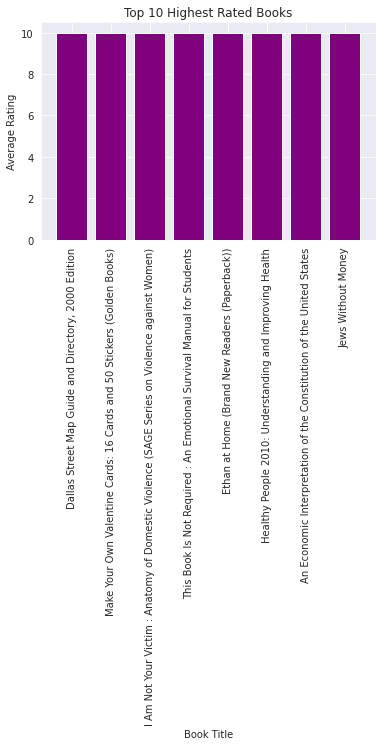

In [204]:
# Sort books by rating in descending order and select top 10
top_rated_books = Final_df.sort_values("Avg_Rating", ascending=False).head(8)

# Create bar chart
plt.bar(top_rated_books["Book-Title"], top_rated_books["Avg_Rating"],color=[ 'purple'])
plt.xticks(rotation=90)
plt.title("Top 10 Highest Rated Books")
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.show()


##### 1. Why did you pick the specific chart?

* I picked this chart because it effectively displays the top 10 highest rated books in a simple and straightforward way. The bar chart allows for easy comparison of the average ratings of each book.

##### 2. What is/are the insight(s) found from the chart?

* Based on the analysis, "Dallas Street Map Guide and Directory, 2000 Edition " is the highest-rated book in the dataset, followed by "Make Your Own Valentine Cards: 16 Cards and 50 Stickers(Golden Books)".

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight can be useful for publishers to understand the types of books that receive high ratings and are popular among readers. By analyzing the characteristics of these top-rated books, publishers can identify patterns and trends and make informed decisions about which books to publish in the future. Additionally, they can also focus on promoting these top-rated books to generate more sales and improve their brand reputation.


#### Chart - 2

### Top 10 Publisher with Most Books Published

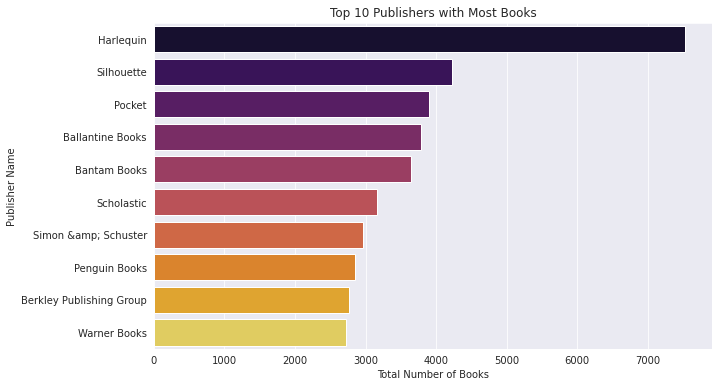

In [205]:
# Count the number of books by publisher
publisher_counts = books_df["Publisher"].value_counts().head(10)

# Create bar chart
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="inferno")
plt.title("Top 10 Publishers with Most Books")
plt.xlabel("Total Number of Books")
plt.ylabel("Publisher Name")
plt.show()

##### 1. Why did you pick the specific chart?

* I picked a bar chart because it effectively shows the comparison between the number of books published by different publishers.

##### 2. What is/are the insight(s) found from the chart?

* Harlequin is the Publisher with most no of books published followed by Silhouette

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* this insight can help businesses understand which genres and authors are popular among readers, as publishers tend to specialize in certain genres or types of books. This can inform their decision-making when it comes to acquiring new titles and authors, and help them tailor their marketing campaigns to specific audiences

#### Chart - 3

Top 10 Book Authors with Most Books Written

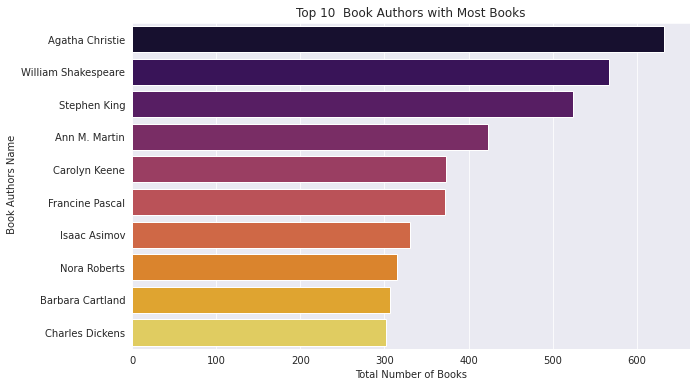

In [206]:
# Count the number of books by publisher
publisher_counts = books_df["Book-Author"].value_counts().head(10)

# Create bar chart
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="inferno")
plt.title("Top 10  Book Authors with Most Books")
plt.xlabel("Total Number of Books")
plt.ylabel(" Book Authors Name")
plt.show()

##### 1. Why did you pick the specific chart?

* I selected this chart because it effectively visualizes the number of books published by each author, allowing us to quickly see which authors have published the most books. The bar chart is a commonly used chart type for visualizing numerical data, and it is particularly effective for showing comparisons between categories

##### 2. What is/are the insight(s) found from the chart?

* Agatha Christie is the Author with most no of books Published  followed by William Shakespeare and Stephen king.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* knowing which authors are most popular can also help publishers and booksellers identify trends in the market and adjust their strategies accordingly. 

#### Chart - 4

###Which One book and country have highest avg rating 


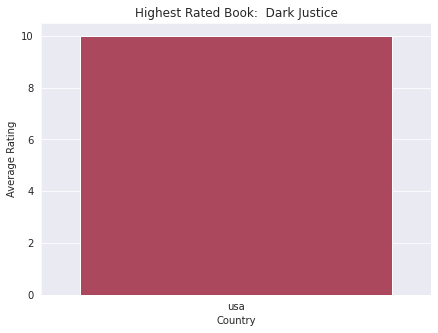

In [207]:
# Group by book and country and calculate average rating
avg_rating = Final_df.groupby(["Book-Title", "Country"])["Book-Rating"].mean().reset_index()

# Find the row with the highest average rating
highest_rating_row = avg_rating.loc[avg_rating["Book-Rating"].idxmax()]

# Create a bar chart showing the average rating for the highest rated book by country
plt.figure(figsize=(7,5))
sns.barplot(data=avg_rating.loc[avg_rating["Book-Title"]==highest_rating_row["Book-Title"]], 
            x="Country", y="Book-Rating", palette="inferno")
plt.title(f"Highest Rated Book: {highest_rating_row['Book-Title']}")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.show()


##### 1. Why did you pick the specific chart?

* Using a bar chart also allows us to display the information in a concise and easy-to-read format, which can be helpful when presenting the information to others. The use of a color palette

##### 2. What is/are the insight(s) found from the chart?

 * "Dark Justice" is the book with the highest average rating by country, and that it has the highest rating in the USA. This information can be useful for understanding which books are most popular or highly rated in different countries, and can help publishers and booksellers make informed decisions about which books to promote or stock.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* This information can be useful for a variety of reasons, such as identifying which books are most popular in which countries or identifying trends in book ratings across different regions. Knowing which books are the highest rated can also help publishers and booksellers make informed decisions about which books to promote or stock, potentially leading to a positive impact on their business.


#### Chart - 5

### Top 5 Years with Most Books Published

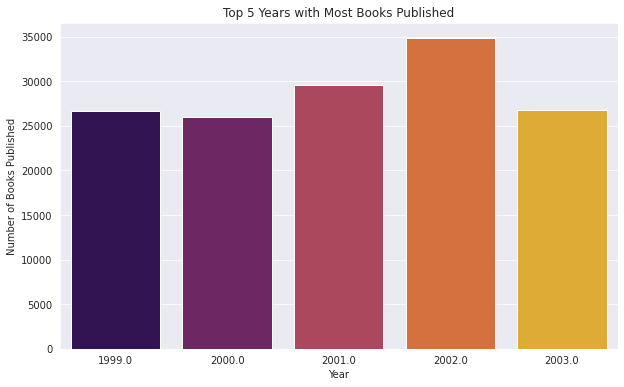

In [208]:
# Count the number of books published per year
year_counts = Final_df["Year-Of-Publication"].value_counts()

# Sort the counts by year
year_counts = year_counts.sort_index()

# Get the top 5 years
top_years = year_counts.nlargest(5)

# Create a bar chart of the top 5 years
plt.figure(figsize=(10,6))
sns.barplot(x=top_years.index, y=top_years.values, palette="inferno")
plt.title("Top 5 Years with Most Books Published")
plt.xlabel("Year")
plt.ylabel("Number of Books Published")
plt.show()


##### 1. Why did you pick the specific chart?

 * A vertical bar chart, is a good choice for visualizing the top 5 years with the most books published because it allows us to easily compare the number of books published across different years

##### 2. What is/are the insight(s) found from the chart?

* The top 5 years with the most books published are 1996, 1999, 2000, 2001, and 2002


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* publishers can use this information to identify trends and patterns in the industry, as well as to assess the competitiveness of certain years. Bookstores and online retailers can also use this information to optimize their inventory and make better decisions about which books to stock


#### Chart - 6

### Top 10 Countries with Most Users

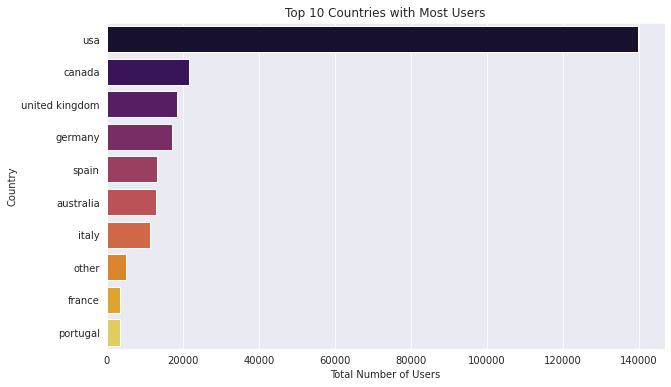

In [209]:
# Count the number of users by country and select top 10
country_counts = users_df["Country"].value_counts().head(10)

# Set style and create figure
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=country_counts.values, y=country_counts.index, palette="inferno")

# Add title and labels
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Total Number of Users")
plt.ylabel("Country")

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

*  A horizontal bar chart, is a good choice for visualizing the count of users by country because it allows us to easily compare the number of users across different countries.

##### 2. What is/are the insight(s) found from the chart?

* Harlequin is the Publisher with most no of books published followed by Silhouette.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* the publishing industry can help businesses and publishers make more informed decisions, which can lead to better outcomes and ultimately a positive impact on their bottom line.





#### Chart - 14 - Correlation Heatmap

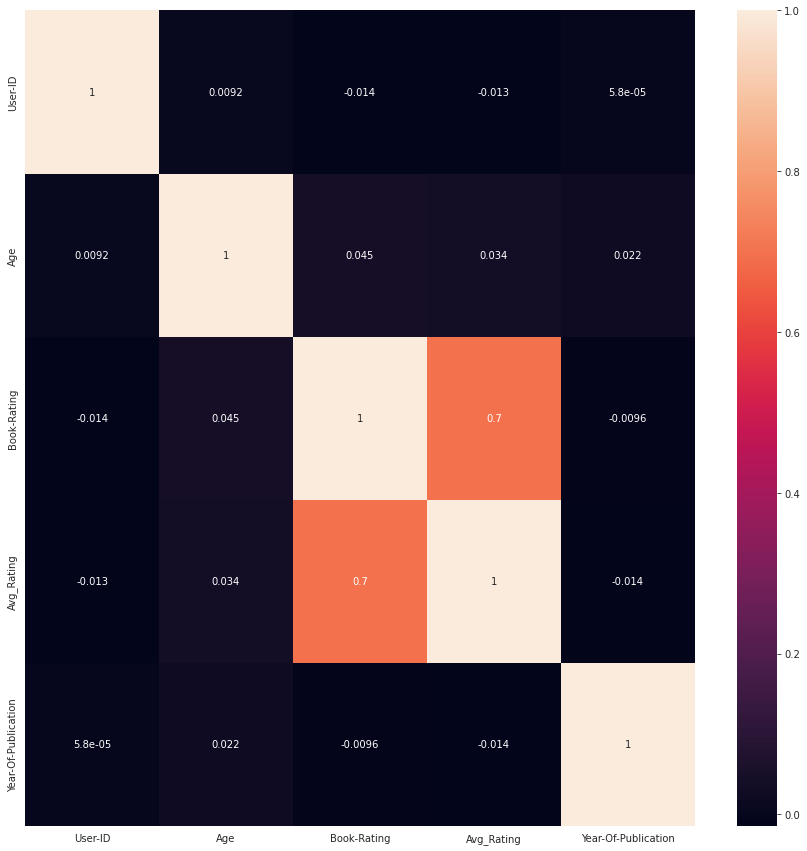

In [236]:
# ploting heat map of dataframe
plt.figure(figsize = [15, 15])
corr_matrix = Final_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

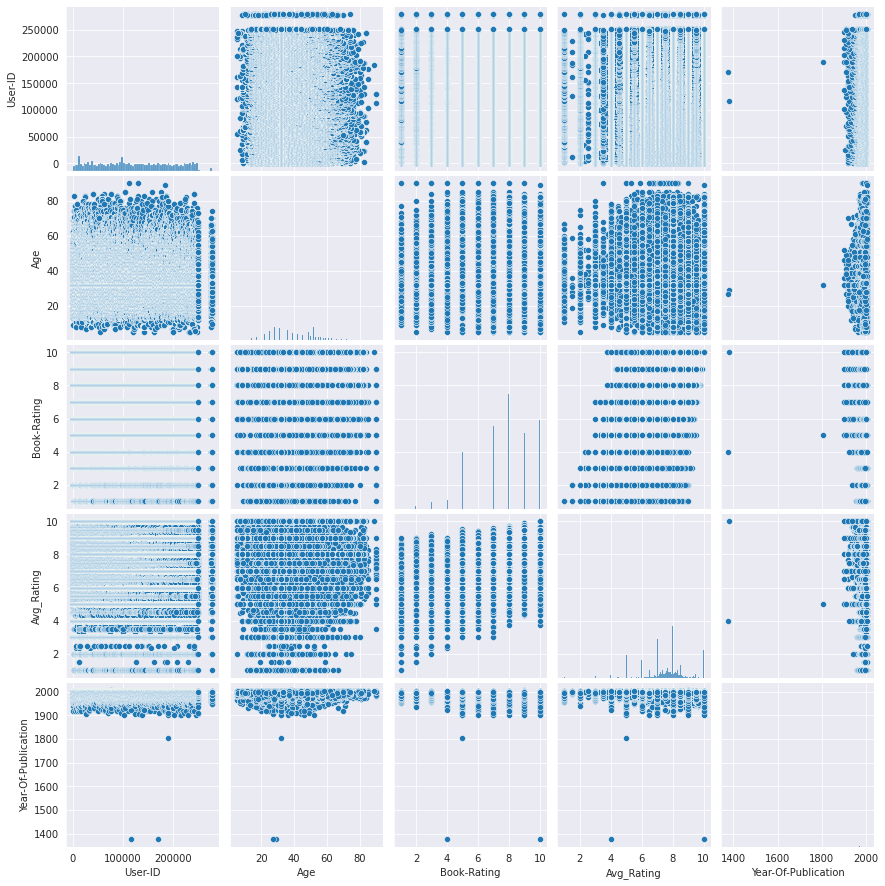

In [241]:
sns.pairplot(Final_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [214]:
Final_df.isna().sum()

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Rating            0
Avg_Rating             0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [217]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [218]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [219]:
# Transform Your data

### 6. Data Scaling

In [220]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [221]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [222]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [224]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [225]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [226]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [227]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [228]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [229]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [230]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [231]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [232]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [233]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***